In [1]:
import numpy as np


class CoinEnv:
    def __init__(self, start_price=1000, avr_m=0.5):
        self.action_space = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        self.start_price = start_price
        self.history=[]
        self.bought_time=[]
        self.sold_time=[]
        self.avr_m=avr_m

    def reset(self):
        self.state = self.start_price
        return self.state

    def step(self, action, current_time):
        current_price = self.state
        if action[1] and len(self.history)*self.avr_m<=30: # buy
            reward = -current_price
            self.history.append(current_price)
            self.bought_time.append(current_time)
        elif action[2] and len(self.history)*self.avr_m!=0: # sell
            reward = current_price
            self.history.remove(min(self.history))
            self.sold_time.append(current_time)
        else:
            reward = 0

        direction = np.random.choice([-1, 1])
        current_price += direction
        current_price=max(0, current_price)
        self.state = current_price
        

        # print(self.history)

        return self.state, reward, False, {'history': self.history, 'bought_time': self.bought_time, 'sold_time': self.sold_time}
        

0 -999 -998 -997 -998 999 1000 999 -998 999 1000 0 0 0 0 -999 -998 -999 -998 -997 -996 -997 -996 -995 -994 -995 -994 -995 -994 -995 -994 -995 -996 -995 -994 -993 -994 -995 -996 997 998 999 998 999 1000 999 1000 999 1000 1001 1002 1001 1000 999 998 999 998 999 1000 999 1000 999 998 0 0 0 0 0 0 -997 998 0 0 -997 998 0 0 -997 -996 -997 998 -997 -996 -995 -996 -997 998 -997 -996 -995 -994 -995 -996 -995 -996 -995 -994 -993 -994 -995 -994 -993 -992 -993 -994 -993 -992 -993 -994 -995 -996 -995 -994 -993 -992 -991 -990 -989 -988 -987 -988 -989 -988 -987 -986 -987 -988 -987 -986 -987 -988 -989 -990 -989 -988 -987 -988 -987 -986 -987 -988 -989 -990 -989 -988 -989 -990 -989 -990 -991 -990 -991 -992 -991 -990 -991 -992 -991 -992 -993 -992 -991 -990 -991 -990 -989 -988 -987 -988 -987 -988 -989 -990 -991 -992 -993 -992 -993 -994 -993 -994 -993 -992 -993 -992 -993 -994 -993 -994 995 996 995 996 997 998 997 998 997 996 997 996 995 996 995 996 995 -994 995 -994 -993 -994 -993 -992 -993 -992 -993 -992 

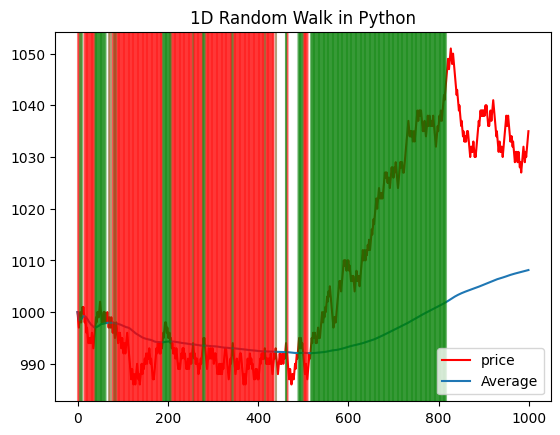

In [67]:
import matplotlib.pyplot as plt

total_total_reward=[]

timeline = []
price_history = []

env = CoinEnv(avr_m=0.1)
state = env.reset()
reward=0
current_time = 0
avr_history=[]
total_reward=[]

for _ in range(1000):
    timeline.append(current_time)
    price_history.append(state)
    # action = env.action_space[np.random.randint(3)]
    avr_history.append(np.mean(price_history))
    if state<np.mean(price_history):
        action = env.action_space[1]
    else:
        action = env.action_space[2]
    # action = env.action_space[0]
    state, reward, _, history = env.step(action, current_time)
    current_time += 1
    total_reward.append(reward)
for _ in env.history:
    total_reward.append(state)
print(" ".join(map(str, total_reward)))
print(f"avr: {np.mean(total_reward)}, max: {max(total_reward)}, min: {min(total_reward)}")

plt.plot(timeline, price_history, 'r-', label='price')
# plt.axhline(np.mean(price_history), label='Total Average')
plt.plot(timeline, avr_history, label='Average')
a,b=False,False
for i in history['bought_time']:
    plt.axvline(i, color='red', alpha=0.3)
for i in history['sold_time']:
    plt.axvline(i, color='green', alpha=0.3)
plt.legend()
plt.title("1D Random Walk in Python")
plt.show()

-1000 1001 -1000 -1001 1000 0 0 999 -998 -999 0 1001 0 -1001 0 -1003 0 -1001 1000 1001 1000 0 -1000 -999 1000 -1001 0 -999 0 -1001 0 -1003 0 0 0 -1001 0 -1001 1002 1001 1002 0 1002 -1001 1002 1001 -1002 -1001 1000 -999 1000 1001 1000 -1001 0 1001 -1000 0 -1000 -999 -998 -997 996 995 996 0 994 -995 -994 -993 0 995 994 0 -992 993 994 -995 0 -997 0 -997 -998 999 0 -999 0 0 0 -1001 -1002 1003 1004 1003 1002 -1003 1002 -1001 1000 999 -998 999 998 -997 996 -997 0 -997 -996 995 996 -997 0 0 1000 999 0 0 -998 -997 -998 -997 -996 997 0 0 996 995 994 0 996 -997 -996 -997 998 999 1000 -999 1000 -1001 -1000 1001 0 1001 -1002 1001 1002 0 1000 -999 0 999 -1000 0 1000 999 -998 997 0 0 -998 999 0 0 -1000 0 -1000 999 998 0 -998 -999 1000 1001 0 -1003 1004 -1005 -1004 -1003 -1004 1005 1006 0 1006 1005 -1004 0 -1002 -1003 0 -1001 1002 1001 1000 1001 -1000 0 1000 -999 998 0 0 0 -998 0 0 0 -1002 -1003 -1004 0 0 1003 0 0 1004 0 -1002 0 0 0 -1004 -1005 0 -1007 -1006 1005 1006 1007 0 -1007 0 1009 -1008 0 0 0 

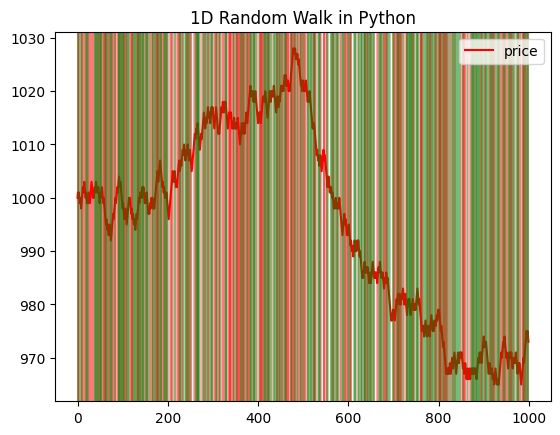

In [72]:
import matplotlib.pyplot as plt

total_total_reward=[]

timeline = []
price_history = []

env = CoinEnv(avr_m=0.1)
state = env.reset()
reward=0
current_time = 0
avr_history=[]
total_reward=[]

for _ in range(1000):
    timeline.append(current_time)
    price_history.append(state)
    action = env.action_space[np.random.randint(3)]
    # avr_history.append(np.mean(price_history))
    # if state<np.mean(price_history):
    #     action = env.action_space[1]
    # else:
    #     action = env.action_space[2]
    # action = env.action_space[0]
    state, reward, _, history = env.step(action, current_time)
    current_time += 1
    total_reward.append(reward)
for _ in env.history:
    total_reward.append(state)
print(" ".join(map(str, total_reward)))
print(f"avr: {np.mean(total_reward)}, max: {max(total_reward)}, min: {min(total_reward)}")

plt.plot(timeline, price_history, 'r-', label='price')
# plt.axhline(np.mean(price_history), label='Total Average')
# plt.plot(timeline, avr_history, label='Average')
a,b=False,False
for i in history['bought_time']:
    plt.axvline(i, color='red', alpha=0.3)
for i in history['sold_time']:
    plt.axvline(i, color='green', alpha=0.3)
plt.legend()
plt.title("1D Random Walk in Python")
plt.show()

In [20]:
class CoinEnv2:
    global test_case
    def __init__(self, start_price=1000, avr_m=0.5):
        self.action_space = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        self.start_price = start_price
        self.history=[]
        self.bought_time=[]
        self.sold_time=[]
        self.avr_m=avr_m

    def reset(self):
        self.state = self.start_price
        return self.state

    def step(self, action, current_time):
        current_price = self.state
        if action[1] and len(self.history)*self.avr_m<=30: # buy
            reward = -current_price
            self.history.append(current_price)
            self.bought_time.append(current_time)
        elif action[2] and len(self.history)*self.avr_m!=0: # sell
            reward = current_price
            self.history.remove(min(self.history))
            self.sold_time.append(current_time)
        else:
            reward = 0

        # direction = np.random.choice([-1, 1])
        direction=test_case[current_time]
        current_price += direction
        current_price=max(0, current_price)
        self.state = current_price
        

        # print(self.history)

        return self.state, reward, False, {'history': self.history, 'bought_time': self.bought_time, 'sold_time': self.sold_time}

In [ ]:
total_total_reward=[[] for i in range(5)]

In [56]:
total_total_reward.append([])

0 0 -1000 -999 -998 -997 -996 -995 -996 -995 -994 -993 -994 -995 -996 0 -996 0 -996 -995 -996 -995 -996 -995 -994 -993 -994 -993 -992 -991 -992 -991 -992 -991 -990 -989 -990 -989 -988 -987 -986 -987 -988 -989 -990 -989 -988 -987 -986 -987 -986 -987 -986 -985 -984 -983 -984 -983 -982 -983 -984 -985 -986 -987 -986 -987 -988 -989 -988 -987 -988 -989 -988 -987 -988 -989 -990 -989 -990 -989 -990 0 0 0 0 0 0 0 0 0 0 0 0 0 -990 -989 -988 -987 -986 -987 -986 -987 -988 -989 -988 -989 -988 -987 -988 -989 -988 -987 -988 -987 -986 -985 -984 -985 -984 -983 -982 -983 -982 -983 -982 -981 -982 -981 -982 -981 -982 -983 -982 -981 -982 -981 -980 -981 -982 -983 -982 -981 -980 -981 -980 -981 -980 -979 -980 -979 -980 -981 -982 -983 -982 -983 -984 -985 -986 -987 -986 -987 -986 -985 -984 -983 -984 -983 -982 -981 -980 -979 -980 -979 -978 -979 -980 -981 -980 -979 -978 -979 -980 -979 -978 -979 -980 -981 -982 -983 -984 -983 -982 -981 -982 -983 -984 -985 -984 -983 -984 -983 -984 -985 -986 0 0 0 -986 -985 -984 -985

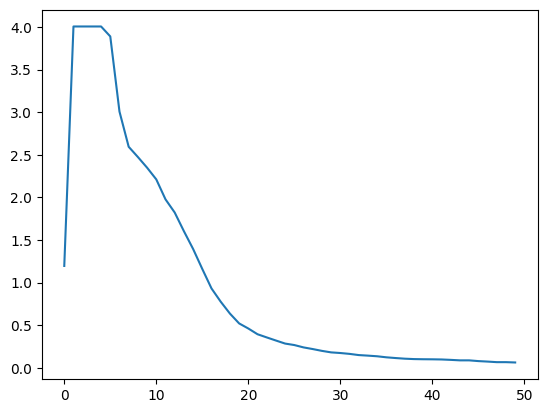

In [58]:
import matplotlib.pyplot as plt



for i in range(50):
    

    timeline = []
    price_history = []

    env = CoinEnv2(avr_m=i*0.02)
    state = env.reset()
    reward=0
    current_time = 0
    avr_history=[]
    total_reward=[]

    for _ in range(1000):
        timeline.append(current_time)
        price_history.append(state)
        # action = env.action_space[np.random.randint(3)]
        avr_history.append(np.mean(price_history))
        if state<np.mean(price_history):
            action = env.action_space[1]
        else:
            action = env.action_space[2]
        # action = env.action_space[0]
        state, reward, _, history = env.step(action, current_time)
        current_time += 1
        total_reward.append(reward)
    for _ in env.history:
        total_reward.append(state)
    print(" ".join(map(str, total_reward)))
    print(f"avr: {np.mean(total_reward)}, max: {max(total_reward)}, min: {min(total_reward)}")

    # plt.plot(timeline, price_history, 'r-', label='price')
    # # plt.axhline(np.mean(price_history), label='Total Average')
    # plt.plot(timeline, avr_history, label='Average')
    # a,b=False,False
    # for i in history['bought_time']:
    #     plt.axvline(i, color='red', alpha=0.3)
    # for i in history['sold_time']:
    #     plt.axvline(i, color='green', alpha=0.3)
    # plt.legend()
    # plt.title("1D Random Walk in Python")
    # plt.show()
    total_total_reward[5].append(np.mean(total_reward))

plt.plot(range(50), total_total_reward[5])
plt.show()

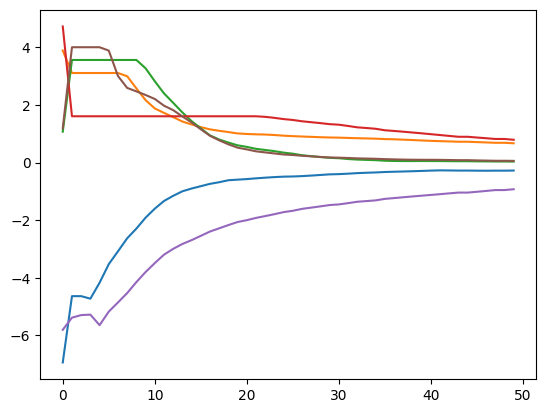

In [60]:
for i in range(6):
    plt.plot(range(50), total_total_reward[i])
plt.show()

In [35]:
total_total_reward

[-0.20389000670690813,
 1.4309687261632342,
 1.4309687261632342,
 1.4309687261632342,
 1.4309687261632342,
 1.4289008455034589,
 1.3333333333333333,
 1.2148148148148148,
 1.1885521885521886,
 1.1619537275064267,
 1.211120764552563,
 1.237467018469657,
 1.1873889875666075,
 1.103942652329749,
 1.0144404332129964,
 0.9309718437783833,
 0.8455210237659964,
 0.7759412304866851,
 0.7177121771217713,
 0.6506024096385542,
 0.6263940520446096,
 0.5951492537313433,
 0.5696913002806361,
 0.5337711069418386,
 0.4967074317968015,
 0.470311027332705,
 0.43950850661625707,
 0.42045454545454547,
 0.3956356736242884,
 0.37072243346007605,
 0.3577545195052331,
 0.334604385128694,
 0.30754536771728747,
 0.29349904397705545,
 0.28038277511961723,
 0.25119846596356665,
 0.23512476007677544,
 0.2219020172910663,
 0.20961538461538462,
 0.19826756496631376,
 0.1859344894026975,
 0.17647058823529413,
 0.16602316602316602,
 0.1565217391304348,
 0.1565217391304348,
 0.14796905222437137,
 0.13843175217812198,
 0

In [57]:
test_case=[np.random.choice([-1,1]) for i in range(1000)]
test_case

[1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,

In [10]:
test_case2=[]
for i in range(1000):
    if i==0:
        test_case2.append(0)
    else:
        test_case2.append(test_case[i]-test_case[i-1])

test_case2

[0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 